In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
!pip install squarify

In [4]:
import squarify as squarify

In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
#https://drive.google.com/file/d/1y4_n4twjE4VSLSC-V7QsdPJ5JR9fiVgG/view?usp=sharing GooglePlayStore.csv
#https://drive.google.com/file/d/1HBgBzv4HU1wQKKblj8p--9lJEMSGYczg/view?usp=sharing GooglePlayStore_User_Reviews.csv

id1='1y4_n4twjE4VSLSC-V7QsdPJ5JR9fiVgG'
id2='1HBgBzv4HU1wQKKblj8p--9lJEMSGYczg'
downloaded1 = drive.CreateFile({'id': id1})
downloaded1.GetContentFile('GooglePlayStore.csv')
downloaded2 = drive.CreateFile({'id': id2})
downloaded2.GetContentFile('GooglePlayStore_User_Reviews.csv')

In [7]:
appDetails=pd.read_csv('GooglePlayStore.csv')
appReviews=pd.read_csv('GooglePlayStore_User_Reviews.csv')

In [8]:
appDetails

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [9]:
appDetails = appDetails.loc[:,['App','Category', 'Rating', 'Installs', 'Type', 'Content Rating']]

In [10]:
appDetails.duplicated().value_counts()

False    9757
True     1084
dtype: int64

In [11]:
appDetails = appDetails.drop_duplicates()
appDetails

,App,Category,Rating,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,"10,000+",Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.90,"500,000+",Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,"5,000,000+",Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,"50,000,000+",Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,"100,000+",Free,Everyone
...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50,"5,000+",Free,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,100+,Free,Everyone
10838,Parkinson Exercices FR,MEDICAL,NaN,"1,000+",Free,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,"1,000+",Free,Mature 17+


In [12]:
appDetails = appDetails[appDetails['App'].notna()]
appDetails = appDetails[appDetails['Type'].notna()]
appDetails

,App,Category,Rating,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,"10,000+",Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.90,"500,000+",Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,"5,000,000+",Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,"50,000,000+",Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,"100,000+",Free,Everyone
...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50,"5,000+",Free,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,100+,Free,Everyone
10838,Parkinson Exercices FR,MEDICAL,NaN,"1,000+",Free,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,"1,000+",Free,Mature 17+


In [13]:
appDetails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9756 entries, 0 to 10840
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9756 non-null   object 
 1   Category        9756 non-null   object 
 2   Rating          8292 non-null   float64
 3   Installs        9756 non-null   object 
 4   Type            9756 non-null   object 
 5   Content Rating  9755 non-null   object 
dtypes: float64(1), object(5)
memory usage: 533.5+ KB


In [14]:
appDetails['Category'] = appDetails['Category'].str.replace('_',' ')
appDetails['Category'] = appDetails['Category'].str.lower()
appDetails['Installs Approximated'] = appDetails['Installs'].str.strip('+')
appDetails['Installs Approximated'] = appDetails['Installs Approximated'].str.replace(',','')

In [15]:
appDetails = appDetails.loc[:,['App','Category', 'Rating', 'Type', 'Content Rating', 'Installs Approximated']]
appDetails

,App,Category,Rating,Type,Content Rating,Installs Approximated
0,Photo Editor & Candy Camera & Grid & ScrapBook,art and design,4.10,Free,Everyone,10000
1,Coloring book moana,art and design,3.90,Free,Everyone,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art and design,4.70,Free,Everyone,5000000
3,Sketch - Draw & Paint,art and design,4.50,Free,Teen,50000000
4,Pixel Draw - Number Art Coloring Book,art and design,4.30,Free,Everyone,100000
...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,family,4.50,Free,Everyone,5000
10837,Fr. Mike Schmitz Audio Teachings,family,5.00,Free,Everyone,100
10838,Parkinson Exercices FR,medical,NaN,Free,Everyone,1000
10839,The SCP Foundation DB fr nn5n,books and reference,4.50,Free,Mature 17+,1000


Se detectó previamente que no se pudo convertir el tipo de Installs Approximated a int, a presencia de un 'Free'.

In [16]:
appDetails[appDetails['Installs Approximated']=='Free']

,App,Category,Rating,Type,Content Rating,Installs Approximated
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.00,0,NaN,Free


In [17]:
appDetails = appDetails.drop(10472)
appDetails.reset_index()

,index,App,Category,Rating,Type,Content Rating,Installs Approximated
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,art and design,4.10,Free,Everyone,10000
1,1,Coloring book moana,art and design,3.90,Free,Everyone,500000
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art and design,4.70,Free,Everyone,5000000
3,3,Sketch - Draw & Paint,art and design,4.50,Free,Teen,50000000
4,4,Pixel Draw - Number Art Coloring Book,art and design,4.30,Free,Everyone,100000
...,...,...,...,...,...,...,...
9750,10836,Sya9a Maroc - FR,family,4.50,Free,Everyone,5000
9751,10837,Fr. Mike Schmitz Audio Teachings,family,5.00,Free,Everyone,100
9752,10838,Parkinson Exercices FR,medical,NaN,Free,Everyone,1000
9753,10839,The SCP Foundation DB fr nn5n,books and reference,4.50,Free,Mature 17+,1000


In [18]:
appDetails['App']=appDetails['App'].astype('string')
appDetails['Category']=appDetails['Category'].astype('category')
appDetails['Rating']=appDetails['Rating'].astype('float')
appDetails['Type']=appDetails['Type'].astype('category')
appDetails['Content Rating']=appDetails['Content Rating'].astype('category')
appDetails['Installs Approximated']=appDetails['Installs Approximated'].astype('int')
appDetails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9755 entries, 0 to 10840
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   App                    9755 non-null   string  
 1   Category               9755 non-null   category
 2   Rating                 8291 non-null   float64 
 3   Type                   9755 non-null   category
 4   Content Rating         9755 non-null   category
 5   Installs Approximated  9755 non-null   int64   
dtypes: category(3), float64(1), int64(1), string(1)
memory usage: 335.1 KB


In [19]:
appDetails["Rating"] = appDetails["Rating"].fillna(0)
appDetails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9755 entries, 0 to 10840
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   App                    9755 non-null   string  
 1   Category               9755 non-null   category
 2   Rating                 9755 non-null   float64 
 3   Type                   9755 non-null   category
 4   Content Rating         9755 non-null   category
 5   Installs Approximated  9755 non-null   int64   
dtypes: category(3), float64(1), int64(1), string(1)
memory usage: 335.1 KB


In [20]:
ratingByCategoryAndType = pd.pivot_table(appDetails,values='Rating',index=['Category','Type'],aggfunc='mean')
ratingByCategoryAndType

Rating
Category          Type                     
art and design    Free                 4.12
                  Paid                 4.73
auto and vehicles Free                 3.67
                  Paid                 1.53
beauty            Free                 3.39
...                                     ...
travel and local  Paid                 2.73
video players     Free                 3.67
                  Paid                 4.10
weather           Free                 3.87
                  Paid                 3.83

[63 rows x 1 columns]

In [21]:
ratingByCategoryAndTypeUnstacked = ratingByCategoryAndType.unstack().fillna(0)
ratingByCategoryAndTypeUnstacked

Rating                     
Type                                Free                 Paid
Category                                                     
art and design                      4.12                 4.73
auto and vehicles                   3.67                 1.53
beauty                              3.39                 0.00
books and reference                 3.61                 1.22
business                            2.55                 3.06
comics                              4.03                 0.00
communication                       3.36                 3.31
dating                              3.16                 1.72
education                           4.31                 4.75
entertainment                       4.13                 4.60
events                              3.17                 0.00
family                              3.70                 3.62
finance                             3.64                 2.93
food and drink                      3.49                 4.35
game                                4.04                 4.05
health and fitness                  3.62                 3.22
house and home                      3.48                 0.00
libraries and demo                  3.22                 0.00
lifestyle                           3.30                 4.03
maps and navigation                 3.63                 3.86
medical                             3.02                 3.21
news and magazines                  3.30                 4.80
parenting                           3.59                 3.35
personalization                     3.40                 3.57
photography                         3.94                 3.17
productivity                        3.42                 2.70
shopping                            3.76                 4.50
social                              3.62                 2.47
sports                              3.34                 3.90
tools                               3.53                 3.37
travel and local                    3.52                 2.73
video players                       3.67                 4.10
weather                             3.87                 3.83

# Heatmap

Text(0.0, 1.0, 'Rating Mean By Category and Type (Paid or Free)')

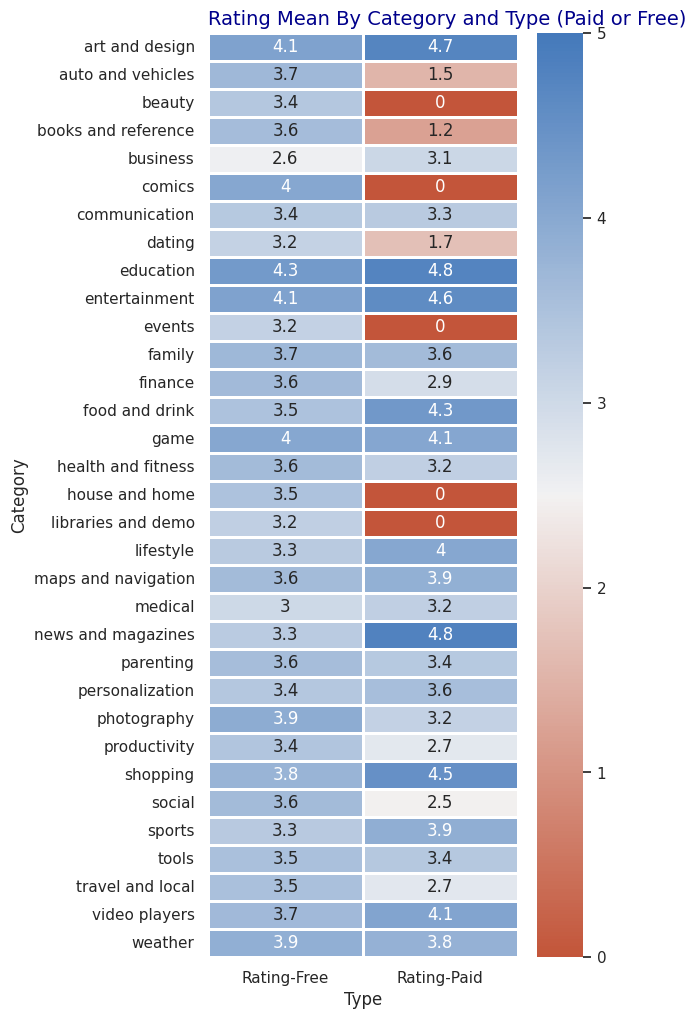

In [22]:
plt.figure(figsize = (5,12))
colorMap = sns.diverging_palette(20, 250, as_cmap=True)
s=sns.heatmap(ratingByCategoryAndTypeUnstacked.fillna(0),cmap=colorMap,annot=True, linewidth=1, linecolor='white')
s.collections[0].set_clim(0,5)
s.set_xlabel('Type', fontsize=12)
s.set_ylabel('Category', fontsize=12)
plt.title('Rating Mean By Category and Type (Paid or Free)', size=14, color='darkblue', loc='left')